# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

## *IMPORT LIBRARIES*

In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


## *LOAD DATASET*

In [2]:
df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## *DATA DESCRIPTION*

* **Id**: This is likely a unique identifier assigned to each employee in the dataset. It's used to distinguish and reference individual records.<br>
* **EmployeeName**: This represents the name of the employee, providing information about the identity of each individual in the dataset.<br>
* **JobTitle**: JobTitle indicates the specific role or position held by each employee, providing information about their responsibilities within the organization.<br>
* **BasePay**:BasePay refers to the basic salary or wage that an employee receives before any additional compensations such as overtime pay or bonuses.<br>
* **OvertimePay**:OvertimePay represents the additional compensation an employee receives for working more hours than their standard working hours. This is often paid at a higher rate than the regular pay.<br>
* **OtherPay**:OtherPay includes any additional payments or allowances that an employee might receive apart from their base salary and overtime pay. It can encompass various types of additional compensation.<br>
* **Benefits**:Benefits include non-salary compensations provided to employees, such as health insurance, retirement contributions, or other perks that contribute to the overall employee compensation package.<br>
* **TotalPay**:TotalPay is the sum of an employee's BasePay, OvertimePay, and OtherPay. It represents the total monetary compensation received by an employee before accounting for benefits.<br>
* **TotalPayBenefits**:TotalPayBenefits is the total compensation received by an employee, including both monetary components (TotalPay) and non-monetary benefits.<br>
* **Year**:Year indicates the calendar year for which the salary information is recorded. It helps in analyzing trends or changes in employee compensation over time.<br>
* **Notes**:Notes may contain additional comments or information about specific records, but it seems to be an optional and supplementary field.<br>
* **Agency**:Agency refers to the organization or agency to which the employee belongs. It provides information about the employer or entity responsible for paying the salaries.<br>
* **Status**:Status could indicate the current employment status of the individual, such as whether they are active, retired, on leave, or any other relevant status.

## TASK 1 BASIC DATA EXPLORATION

#### number of rows and number of columns

In [3]:
print ('number of row is ' , len(df))
print ('number of columns is ' , len(df.columns))


number of row is  148654
number of columns is  13


####  PROPER DATA TYPE??

In [4]:
datatypes=df.dtypes.to_frame(name='DataType')
datatypes

,DataType
Id,int64
EmployeeName,object
JobTitle,object
BasePay,float64
OvertimePay,float64
OtherPay,float64
Benefits,float64
TotalPay,float64
TotalPayBenefits,float64
Year,int64


In [5]:
# every thing looks fine about datatypes

#### MISSING VALUES

In [6]:
df.isna().sum().to_frame(name='missing values')

,missing values
Id,0
EmployeeName,0
JobTitle,0
BasePay,609
OvertimePay,4
OtherPay,4
Benefits,36163
TotalPay,0
TotalPayBenefits,0
Year,0


## TASK 2  DESCRIBTIVE STATISTICS

#### basic statistics 

In [7]:
categorical_cols_statistics =df.select_dtypes("O").describe().T
categorical_cols_statistics

,count,unique,top,freq
EmployeeName,148654,110811,Kevin Lee,13
JobTitle,148654,2159,Transit Operator,7036
Agency,148654,1,San Francisco,148654


In [24]:
numerical_cols_statistics =df.select_dtypes(np.number).describe().T
numerical_cols_statistics['Standard Deviation']=df.select_dtypes(np.number).std()
numerical_cols_statistics['unique']=df.select_dtypes(np.number).nunique()
numerical_cols_statistics

,count,mean,std,min,25%,50%,75%,max,Standard Deviation,unique
Id,148654.0,74327.500000,42912.857795,1.00,37164.2500,74327.500,111490.7500,148654.00,42912.857795,148654
BasePay,148654.0,66078.258892,42857.493420,-166.01,32833.0025,64868.970,94611.0000,319275.01,42857.493420,109740
OvertimePay,148654.0,5065.923568,11454.256594,-0.01,0.0000,0.000,4657.6325,245131.88,11454.256594,65998
OtherPay,148654.0,3648.669115,8056.515703,-7058.59,0.0000,811.170,4235.9075,400184.25,8056.515703,83225
Benefits,148654.0,21185.871842,15442.970188,-33.89,5492.0640,24669.825,33619.6025,96570.66,15442.970188,107527
TotalPay,148654.0,74768.321972,50517.005274,-618.13,36168.9950,71426.610,105839.1350,567595.43,50517.005274,138486
TotalPayBenefits,148654.0,93692.554811,62793.533483,-618.13,44065.6500,92404.090,132876.4500,567595.43,62793.533483,142098
Year,148654.0,2012.522643,1.117538,2011.00,2012.0000,2013.000,2014.0000,2014.00,1.117538,4


In [9]:
print ('RANGE OF SALARIES   :' ,df.TotalPay.max()-df.TotalPay.min())

RANGE OF SALARIES before handling outliers is : 568213.56


## TASK 3 DATA CLEANING 

In [10]:
 #Handle missing data by suitable method with explain why you use it.


#### HANDLING MISSING DATA

In [11]:
missing=df.isna().sum().to_frame(name='number of missing values')
missing['d_type']=df.dtypes
missing['percentage']=missing['number of missing values']/len(df)
missing

,number of missing values,d_type,percentage
Id,0,int64,0.000000
EmployeeName,0,object,0.000000
JobTitle,0,object,0.000000
BasePay,609,float64,0.004097
OvertimePay,4,float64,0.000027
OtherPay,4,float64,0.000027
Benefits,36163,float64,0.243270
TotalPay,0,float64,0.000000
TotalPayBenefits,0,float64,0.000000
Year,0,int64,0.000000


In [12]:
# for those columns where missing values precentage is 100% i will drop the columns they have no value to us
# for other columns like over time pay and other pay i can drop the only 4 rows that have null values but for the benefits column  i have about 25% of the data missing
# so  i cant just drop it i can use mean or median imputing or replace the null values with fixed value but this will be inacurate so i will use knn imputer
# so i can depend on other numerical values to predict the missing values 
# SIMPLY WE WILL USE KNN MODEL AND TRAIN IT ON THE DATA WHICH NOT HAVING NANS AND THEN USE THE TRAINED MODEL TO PREDICT THE NANS BASED ON THE NEAREST K NEIGHBORS
def KNN_IMPUTER(data,col):
    

    
    numerical_data=data.select_dtypes(exclude='O')
    clean_numerical_cols=numerical_data.isna().sum()[numerical_data.isna().sum()==0].index
    
    X_train= numerical_data[clean_numerical_cols][numerical_data[col].isna()==0]
    y_train= numerical_data[col][numerical_data[col].isna()==0]
    
    X_test=numerical_data[clean_numerical_cols][numerical_data[col].isna()==1]
    
    KNN=KNeighborsRegressor(n_neighbors=5)
    KNN.fit(X_train,y_train)
    
    y_pred=KNN.predict(X_test)
    
    data[col][data[col].isna()==1]=y_pred
    
    
    return data
    
# i decided to imoute all values with knn why not 
for col in ['BasePay','OvertimePay','OtherPay','Benefits']:
    clean_df=KNN_IMPUTER(df,col)

C:\Users\agoud\AppData\Local\Temp\ipykernel_15984\1394743518.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col].isna()==1]=y_pred
C:\Users\agoud\AppData\Local\Temp\ipykernel_15984\1394743518.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col].isna()==1]=y_pred
C:\Users\agoud\AppData\Local\Temp\ipykernel_15984\1394743518.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col].i

In [13]:
# check that every thing is ok
clean_df.drop(['Notes','Status'],axis=1,inplace=True)
missing=clean_df.isna().sum().to_frame(name='number of missing values')
missing['d_type']=clean_df.dtypes
missing['percentage']=missing['number of missing values']/len(clean_df)
missing

,number of missing values,d_type,percentage
Id,0,int64,0.0
EmployeeName,0,object,0.0
JobTitle,0,object,0.0
BasePay,0,float64,0.0
OvertimePay,0,float64,0.0
OtherPay,0,float64,0.0
Benefits,0,float64,0.0
TotalPay,0,float64,0.0
TotalPayBenefits,0,float64,0.0
Year,0,int64,0.0


## TASK4 Basic Data Visualization

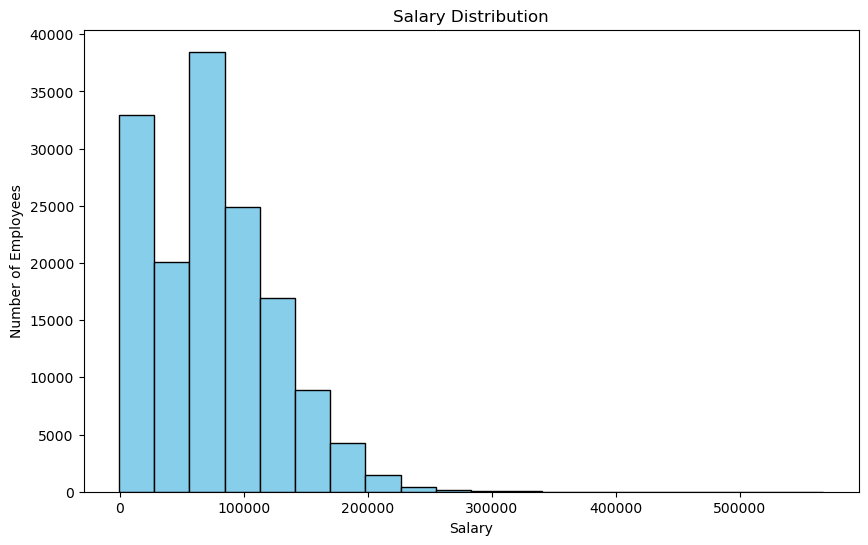

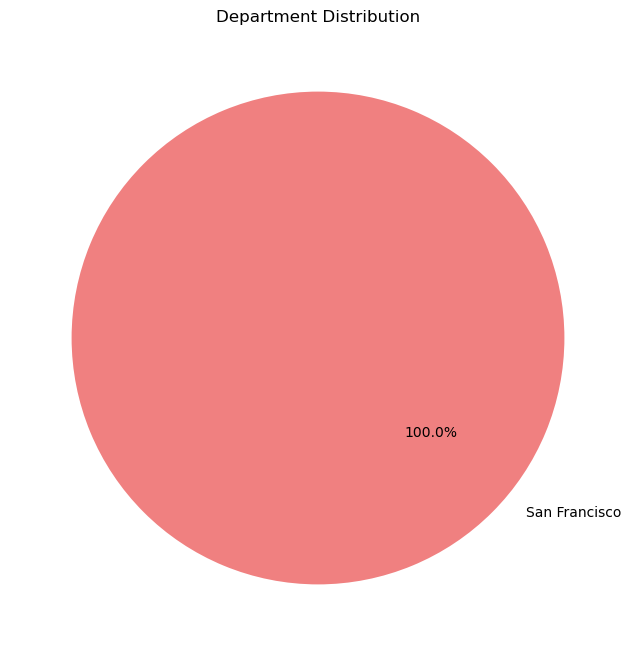

In [27]:

plt.figure(figsize=(10, 6))
plt.hist(clean_df['TotalPay'], bins=20, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.show()


department_counts = clean_df['Agency'].value_counts()
labels = department_counts.index
sizes = department_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue', 'lightgreen', 'gold', 'lightsalmon'])
plt.title('Department Distribution')
plt.show()







## TASK 5 Grouped Analysis

In [17]:
# Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.
clean_df.nunique()

Id                  148654
EmployeeName        110811
JobTitle              2159
BasePay             109740
OvertimePay          65998
OtherPay             83225
Benefits            107527
TotalPay            138486
TotalPayBenefits    142098
Year                     4
Agency                   1
dtype: int64

In [18]:
# i will group the data with year columns because it will be more representive because it has suitable unique values 
grouped_data = clean_df.groupby('Year').agg({
    'TotalPay': 'mean' 
})
grouped_data

,TotalPay
Year,
2011,71744.103871
2012,74113.262265
2013,77611.443142
2014,75463.918140


##  Task 6 Simple Correlation Analysis

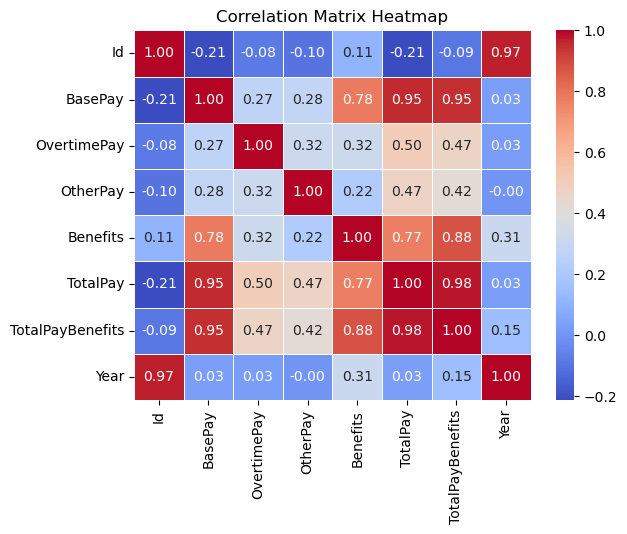

In [19]:

corr_mat = clean_df.corr(numeric_only=True)

sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [20]:
# i can encode categorical cols to see if there a relation or not
encoded_df=clean_df.copy()
label_encoder = LabelEncoder()

# Apply label encoding to the 'Department' column
encoded_df['EmployeeName'] = label_encoder.fit_transform(clean_df['EmployeeName'])
encoded_df['JobTitle'] = label_encoder.fit_transform(clean_df['JobTitle'])
encoded_df['Agency'] = label_encoder.fit_transform(clean_df['Agency'])



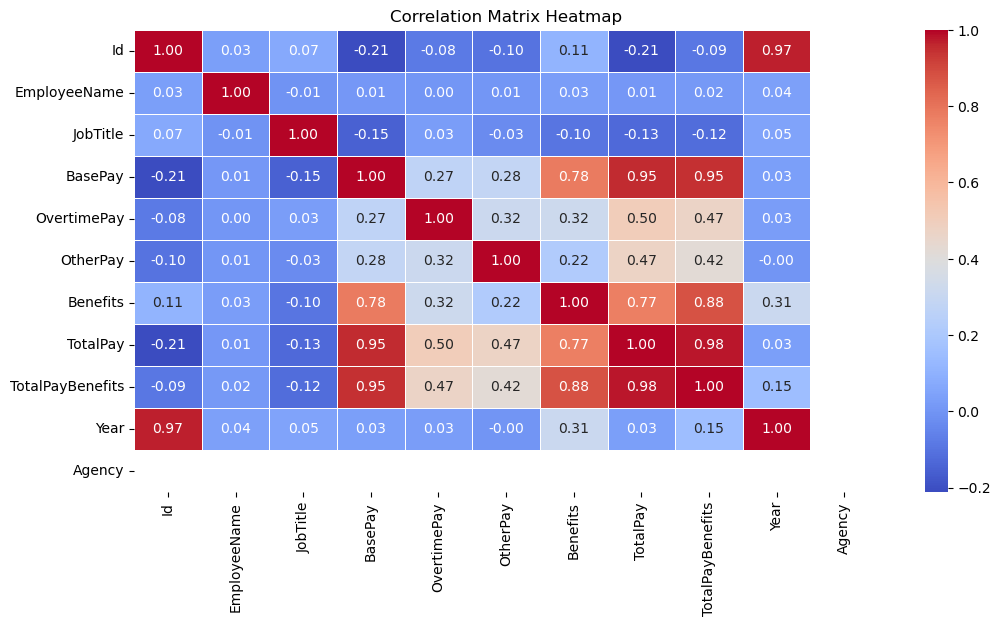

In [21]:
corr_mat = encoded_df.corr()
plt.figure(figsize=(12, 6))

sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

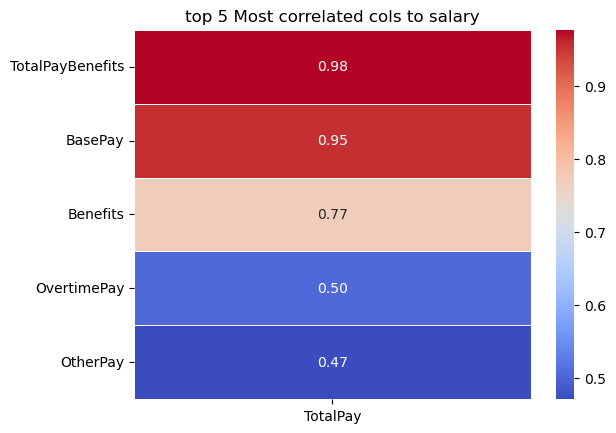

In [22]:
salary_only=corr_mat['TotalPay'].sort_values(ascending=False).drop('TotalPay').to_frame()[:5]
sns.heatmap(salary_only, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('top 5 Most correlated cols to salary')
plt.show()

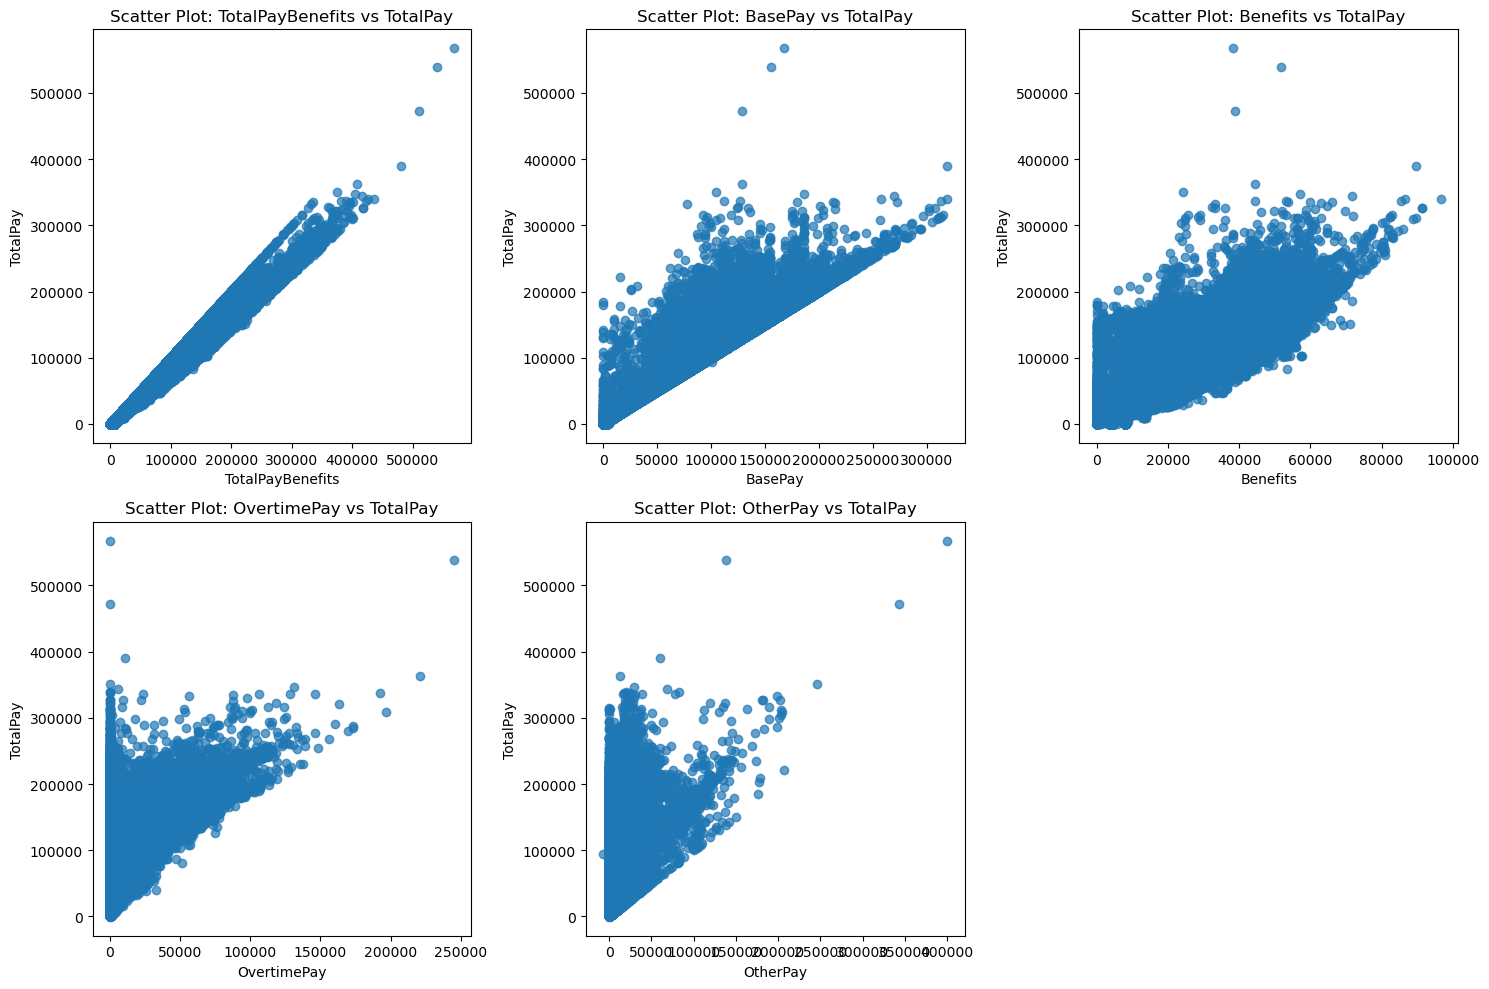

In [23]:
cols=salary_only.index.to_list()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(cols):
    axes[i].scatter(encoded_df[column], encoded_df['TotalPay'], alpha=0.7)
    axes[i].set_title(f'Scatter Plot: {column} vs TotalPay')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('TotalPay')

# Remove the empty 
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()



#### task 7 summary of findings and insights
* **Data contains 148654 rows with 13 feature**
* **all data types are properly identified**
* **when checking missing values i found that there are two columns are completely missing so i decided to remove them in the cleaning task**
* **during data exploration i found out that i have high cardinality cols like id,employee name  but i decided to keep them since i am not going to make any models but itis a thing to keep in mind**
* **i also found out that i have alot of negative values so maybe there is some sort of Salary deduction so i did not do any thing about it since no task for outliers or some thing but it is a thing to keep in mind if i am going to make any sort of ml**
* **during data cleaning i decided to use knn imputer for the only col that have alot of missing values but after defining the imputer i used it even for the cols that have only 4 missing values because why not**
* **for the completely missing cols i decided to drop them because they hace no value**
* **while visualization i tried adifferent number of bins to find a number the explains the distrubition well**
* **after visualization i found out that there is alot of salaries near zero so maybe those are outliers so also this is some thing to keep in mind**
* **i also found out that i have only one department so i maybe drop its colum because it adds no value to my data and make the data name like san francisco salaries or some thing like that**
* **at grouped analysis i tried to find the suitable way to group the data but the features contains alot of unique values whick will be hard to gain insights from so i decided to go with year column to group the data with it and it was great**
* **at correlation analysis i tried to visualize  the correlation between features and salary feature (totalpay) then i encoded categorical feature using label encoder to find the correlation between them and total pay which will be not that big because the high cardinality in these features  and agency also have one value but i did it any way
then i visualized top 5 most correlated features to total pay and show the scatter plot for each**
